In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### 1.1 시각화할 때 한글이 안 깨지게 폰트 설정

In [5]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [14]:
# df = pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory = False)
# df.head()

In [12]:
#import os

In [7]:
df = pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', engine='python', encoding = 'utf-8')
df.shape

(91335, 39)

### 데이터 요약보기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
상가업소번호       91335 non-null int64
상호명          91335 non-null object
지점명          1346 non-null object
상권업종대분류코드    91335 non-null object
상권업종대분류명     91335 non-null object
상권업종중분류코드    91335 non-null object
상권업종중분류명     91335 non-null object
상권업종소분류코드    91335 non-null object
상권업종소분류명     91335 non-null object
표준산업분류코드     86413 non-null object
표준산업분류명      86413 non-null object
시도코드         90956 non-null float64
시도명          90956 non-null object
시군구코드        90956 non-null float64
시군구명         90956 non-null object
행정동코드        91335 non-null int64
행정동명         90956 non-null object
법정동코드        91280 non-null float64
법정동명         91280 non-null object
지번코드         91335 non-null int64
대지구분코드       91335 non-null int64
대지구분명        91335 non-null object
지번본번지        91335 non-null int64
지번부번지        72079 non-null float64
지번주소         91335 non-null object
도로명코드        91335

In [10]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

### 통계정보보기

In [12]:
df['위도'].min()

33.2192896688307

In [13]:
df['위도'].max()

38.499658570559795

In [14]:
df['위도'].count()

91335

In [15]:
df.describe() #describe로 기초통계정보 요약 확인하기

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,72079.000000,9.133500e+04,91335.000000,10604.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32.586712,32898.381877,3.293232e+09,3.293385e+09,3.293191e+18,1.001336,587.534549,17.005092,3.293207e+11,251.200482,7.241135,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,13.045138,12985.393171,1.297387e+09,1.297706e+09,1.297393e+18,0.036524,582.519364,53.451413,1.297391e+11,477.456487,12.426816,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11.000000,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26.000000,26350.000000,2.635065e+09,2.635011e+09,2.635011e+18,1.000000,162.000000,2.000000,2.635042e+11,29.000000,1.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41.000000,41117.000000,4.111758e+09,4.111710e+09,4.111711e+18,1.000000,462.000000,5.000000,4.111743e+11,92.000000,2.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43.000000,43113.000000,4.311370e+09,4.311311e+09,4.311311e+18,1.000000,858.000000,14.000000,4.311332e+11,257.000000,9.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50.000000,50130.000000,5.013061e+09,5.013032e+09,5.013061e+18,2.000000,7338.000000,1428.000000,5.013049e+11,8795.000000,244.000000,799801.000000,63643.00000,130.909912,38.499659


In [16]:
len(df['시도명'].unique()) #고유값의 개수 확인

18

In [17]:
df['시도명'].value_counts() #고유값에 속한 개수 확인

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

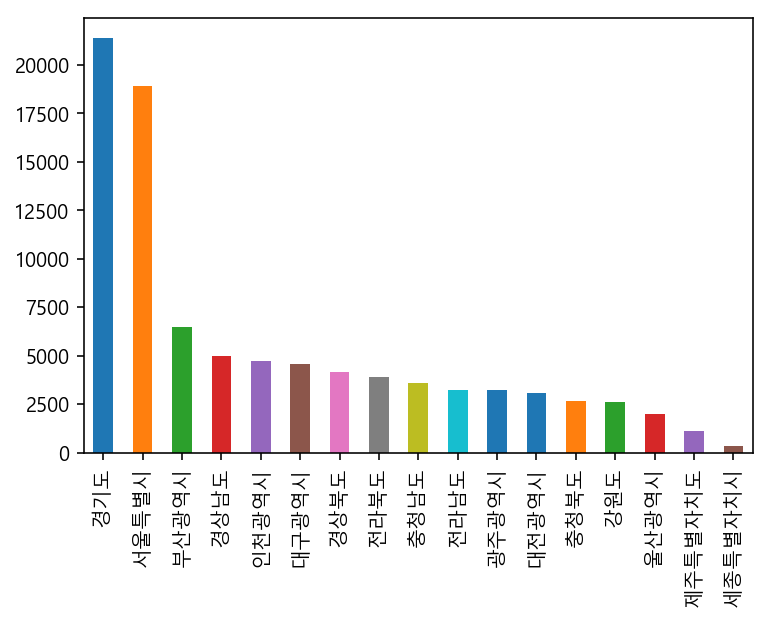

In [18]:
df['시도명'].value_counts().plot.bar() #세로 바 

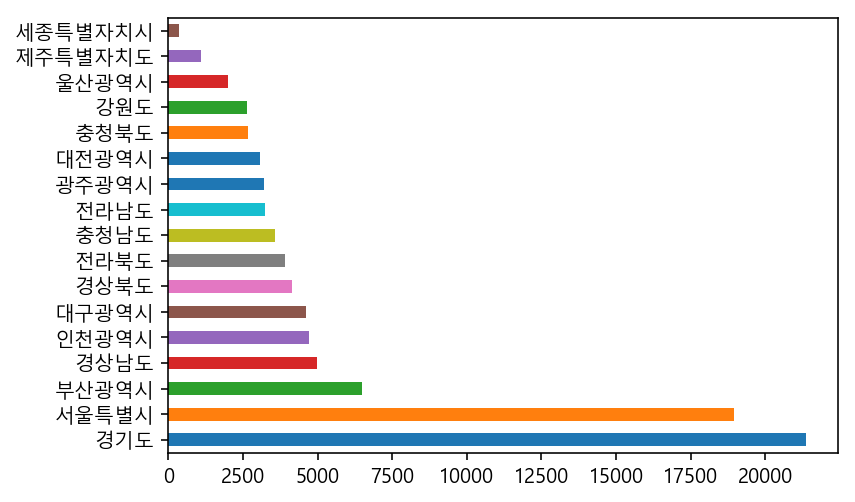

In [19]:
df['시도명'].value_counts().plot.barh() #가로 바 

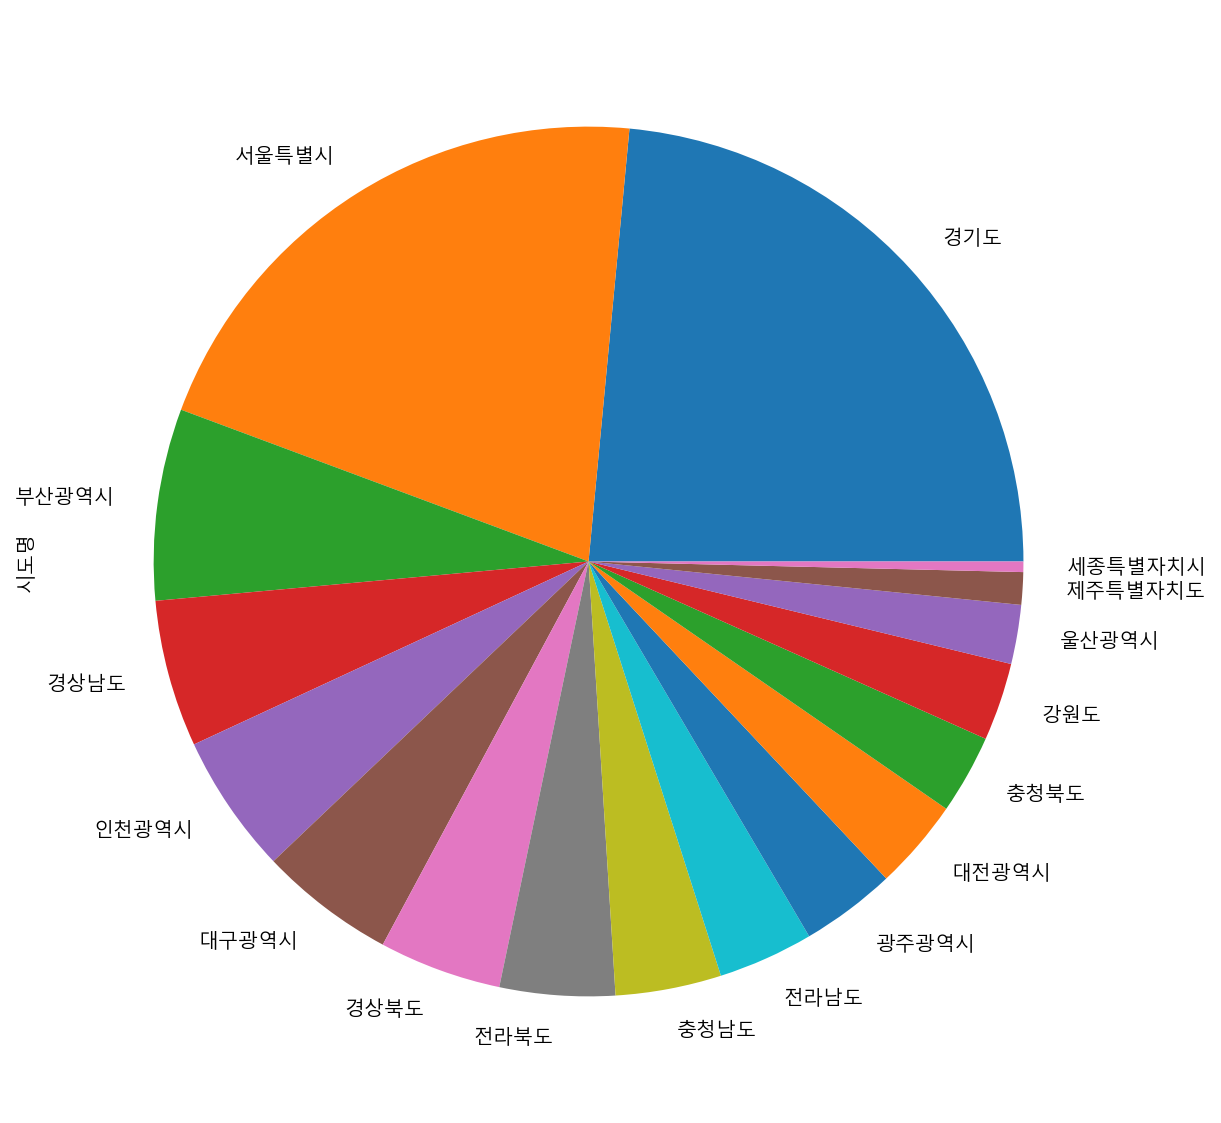

In [20]:
df['시도명'].value_counts().plot.pie(figsize=(10,10)) #원형

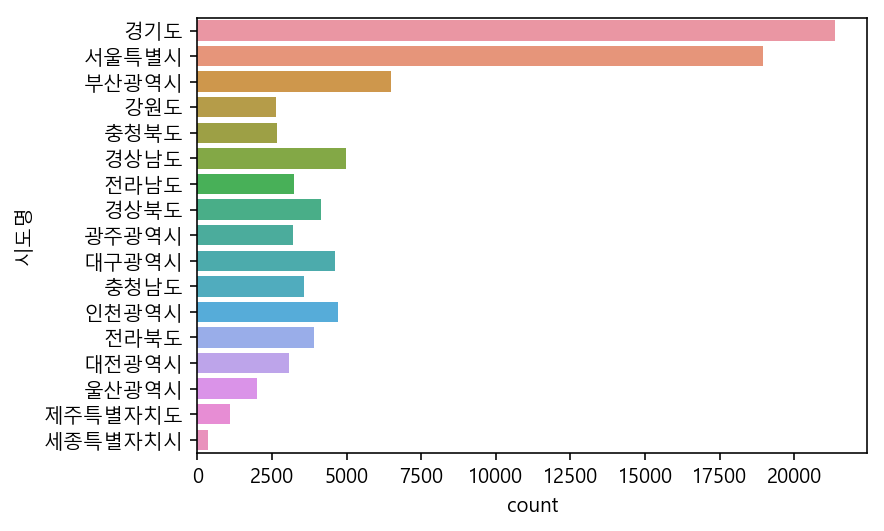

In [21]:
sns.countplot(data=df, y="시도명") #sns는 Seaborn 라이브러리

In [22]:
df_null_count = df.isnull().sum() #isnull로 결측치 확인 가능
df_null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

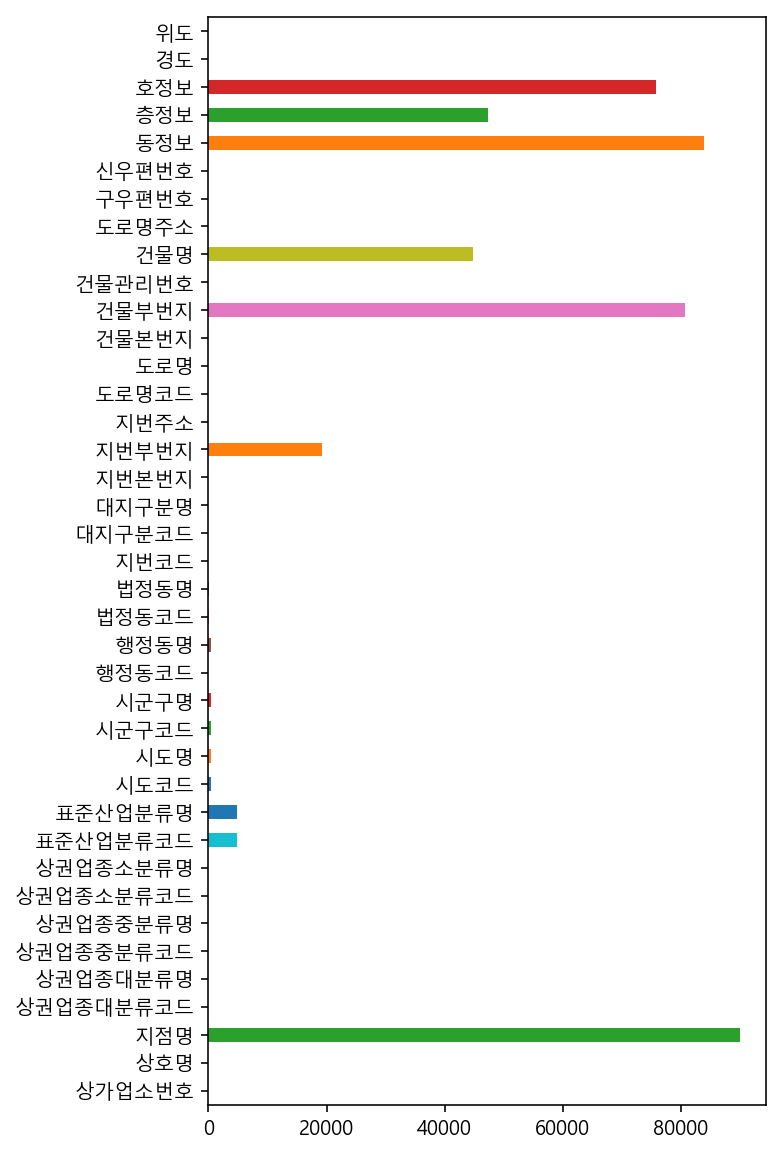

In [23]:
df_null_count.plot.barh(figsize=(5,10))

In [24]:
df_null_count = df_null_count.reset_index() #기존 행 인덱스 제거 후 인덱스에 데이터 추가(재배열)
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [25]:
df_null_count.columns = ['컬럼명', '결측치수']
df_null_count

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


In [26]:
df_null_count_sort = df_null_count.sort_values(by='결측치수',ascending=False) #sort를 통해 많은 순서로 정렬
df_null_count_sort

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [27]:
df_null_count_sort = df_null_count_sort.head(9)
df_null_count_sort

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922


In [28]:
drop_columns = df_null_count_sort['컬럼명'].values
drop_columns

array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명'], dtype=object)

In [29]:
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업


## 결측치 제거
#### > drop을 통한 데이터 삭제 

In [30]:
df.shape

(91335, 39)

In [31]:
df.drop(columns=drop_columns, axis=1).shape 

#axis: 축, 2차원 기준, axis=0: x축인 행 합산/ axis=1: y축인 행 합산

(91335, 30)

In [33]:
df.isnull().sum()

상가업소번호         0
상호명            0
상권업종대분류코드      0
상권업종대분류명       0
상권업종중분류코드      0
상권업종중분류명       0
상권업종소분류코드      0
상권업종소분류명       0
시도코드         379
시도명          379
시군구코드        379
시군구명         379
행정동코드          0
행정동명         379
법정동코드         55
법정동명          55
지번코드           0
대지구분코드         0
대지구분명          0
지번본번지          0
지번주소           0
도로명코드          0
도로명            0
건물본번지          0
건물관리번호         0
도로명주소          0
구우편번호         12
신우편번호          2
경도             0
위도             0
dtype: int64

## 데이터 고르기
#### > 특정 데이터만 모으기

In [34]:
# 상권업종중분류명이 "약국/한약방"인 데이터만 보기
df_medical = df[df['상권업종중분류명']=='약국/한약방']
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,42.0,강원도,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,43.0,충청북도,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,48.0,경상남도,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,46.0,전라남도,...,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [35]:
# 상권업종대분류명이 "의료"인 데이터만 보기
shop_type = df['상권업종대분류명']=='의료'
df.loc[shop_type, '상권업종중분류명'].value_counts() #s

#loc: 인덱스 기준 행 데이터 읽기
#ilic: 행 번호 기준으로 행 데이터 읽기

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

#### > 여러 조건에서 고르기

In [36]:
#서울시의 약국만 뽑기

df_seoul_drug = df[
    (df['상권업종소분류명']=='약국') &
    (df['시도명'] == '서울특별시')
]
df_seoul_drug.head(3)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424


In [37]:
df_seoul_drug['시군구명'].value_counts()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: 시군구명, dtype: int64

In [38]:
df[df['상호명'].str.contains('대학병원')].head()

#str.contains: contain을 기반으로 대학병원 이라는 문자가 포함되었으면 반환해줌

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
193,23651380,동국대학병원일산,S,의료,S01,병원,S01B01,종합병원,41.0,경기도,...,경기도 고양시 일산동구 식사동 814,412853193010,경기도 고양시 일산동구 동국로,27,4128510100108090004022480,경기도 고양시 일산동구 동국로 27,410773.0,10326.0,126.805548,37.676425
363,20632155,경북대학병원응급센터9층,S,의료,S01,병원,S01B01,종합병원,27.0,대구광역시,...,대구광역시 중구 삼덕동2가 50,271103141005,대구광역시 중구 동덕로,130,2711010600100500000010507,대구광역시 중구 동덕로 130,700721.0,41944.0,128.604263,35.866091
2216,25401601,대구보건대학병원치과,S,의료,S01,병원,S01B04,치과의원,27.0,대구광역시,...,대구광역시 북구 동천동 955-3,272304235200,대구광역시 북구 동천로23길,30,2723012400109550004000001,대구광역시 북구 동천로23길 30-3,702886.0,41422.0,128.557075,35.942787
8308,24935585,서남대학병원,S,의료,S01,병원,S01B02,일반병원,29.0,광주광역시,...,광주광역시 북구 용봉동 1252-9,291704286425,광주광역시 북구 설죽로202번길,79,2917010700112520009026940,광주광역시 북구 설죽로202번길 79,500844.0,61183.0,126.901868,35.177423
9727,24126873,순천향대학병원,S,의료,S01,병원,S01B02,일반병원,41.0,경기도,...,경기도 남양주시 가운동 313-1,413603196001,경기도 남양주시 강변북로,805,4136010700103130001000713,경기도 남양주시 강변북로 805,472060.0,12249.0,127.173787,37.601450


In [39]:
df[df['도로명주소'].str.startswith('서울')].head() 
# startswith: 문자열이 특정 문자열로 시작하는지 확인

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강남구 신사동 592-4,116803121022,서울특별시 강남구 논현로,826,1168010700105920004010990,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
9,20755460,헬로스마일소아과,S,의료,S01,병원,S01B11,소아과,11.0,서울특별시,...,서울특별시 강남구 논현동 39-18,116804166129,서울특별시 강남구 논현로131길,30,1168010800100390018000001,서울특별시 강남구 논현로131길 30,135010.0,6045.0,127.027878,37.514144
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강동구 성내동 9-5,117402000008,서울특별시 강동구 천호대로,1032,1174010800100090005004868,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


In [40]:
df[df['상호명'].str.endswith('병원')].head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
5,20809147,행신동물병원,S,의료,S04,수의업,S04A02,동물병원,41.0,경기도,...,경기도 고양시 덕양구 행신동 647-14,412813192072,경기도 고양시 덕양구 행신로,147,4128112800106470014011094,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,126.831632,37.619309
12,21145534,목포동물병원,S,의료,S04,수의업,S04A02,동물병원,46.0,전라남도,...,전라남도 목포시 산정동 1050-78,461103281095,전라남도 목포시 영산로,200,4611010200110500078000665,전라남도 목포시 영산로 200-1,530806.0,58708.0,126.390244,34.799439
20,21085006,제일가축병원,S,의료,S04,수의업,S04A02,동물병원,41.0,경기도,...,경기도 남양주시 퇴계원면 퇴계원리 204-12,413604391137,경기도 남양주시 퇴계원면 경춘북로558번길,7,4136037021102040012005537,경기도 남양주시 퇴계원면 경춘북로558번길 7-7,472821.0,12126.0,127.146600,37.647633
21,21128898,다사랑요양병원,S,의료,S01,병원,S01B17,노인/치매병원,26.0,부산광역시,...,부산광역시 북구 만덕동 136-2,263203132005,부산광역시 북구 덕천로,339,2632010300101360002000001,부산광역시 북구 덕천로 339,616110.0,46610.0,129.040773,35.209154
25,21055738,축협동물병원,S,의료,S04,수의업,S04A02,동물병원,46.0,전라남도,...,전라남도 담양군 담양읍 백동리 342,467104658181,전라남도 담양군 담양읍 삼거리길,8,4671025025103420000000164,전라남도 담양군 담양읍 삼거리길 8-6,517806.0,57347.0,126.981972,35.310645


In [41]:
df_seoul = df[df['시도명']=='서울특별시']
df_seoul.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강남구 신사동 592-4,116803121022,서울특별시 강남구 논현로,826,1168010700105920004010990,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
9,20755460,헬로스마일소아과,S,의료,S01,병원,S01B11,소아과,11.0,서울특별시,...,서울특별시 강남구 논현동 39-18,116804166129,서울특별시 강남구 논현로131길,30,1168010800100390018000001,서울특별시 강남구 논현로131길 30,135010.0,6045.0,127.027878,37.514144
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강동구 성내동 9-5,117402000008,서울특별시 강동구 천호대로,1032,1174010800100090005004868,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


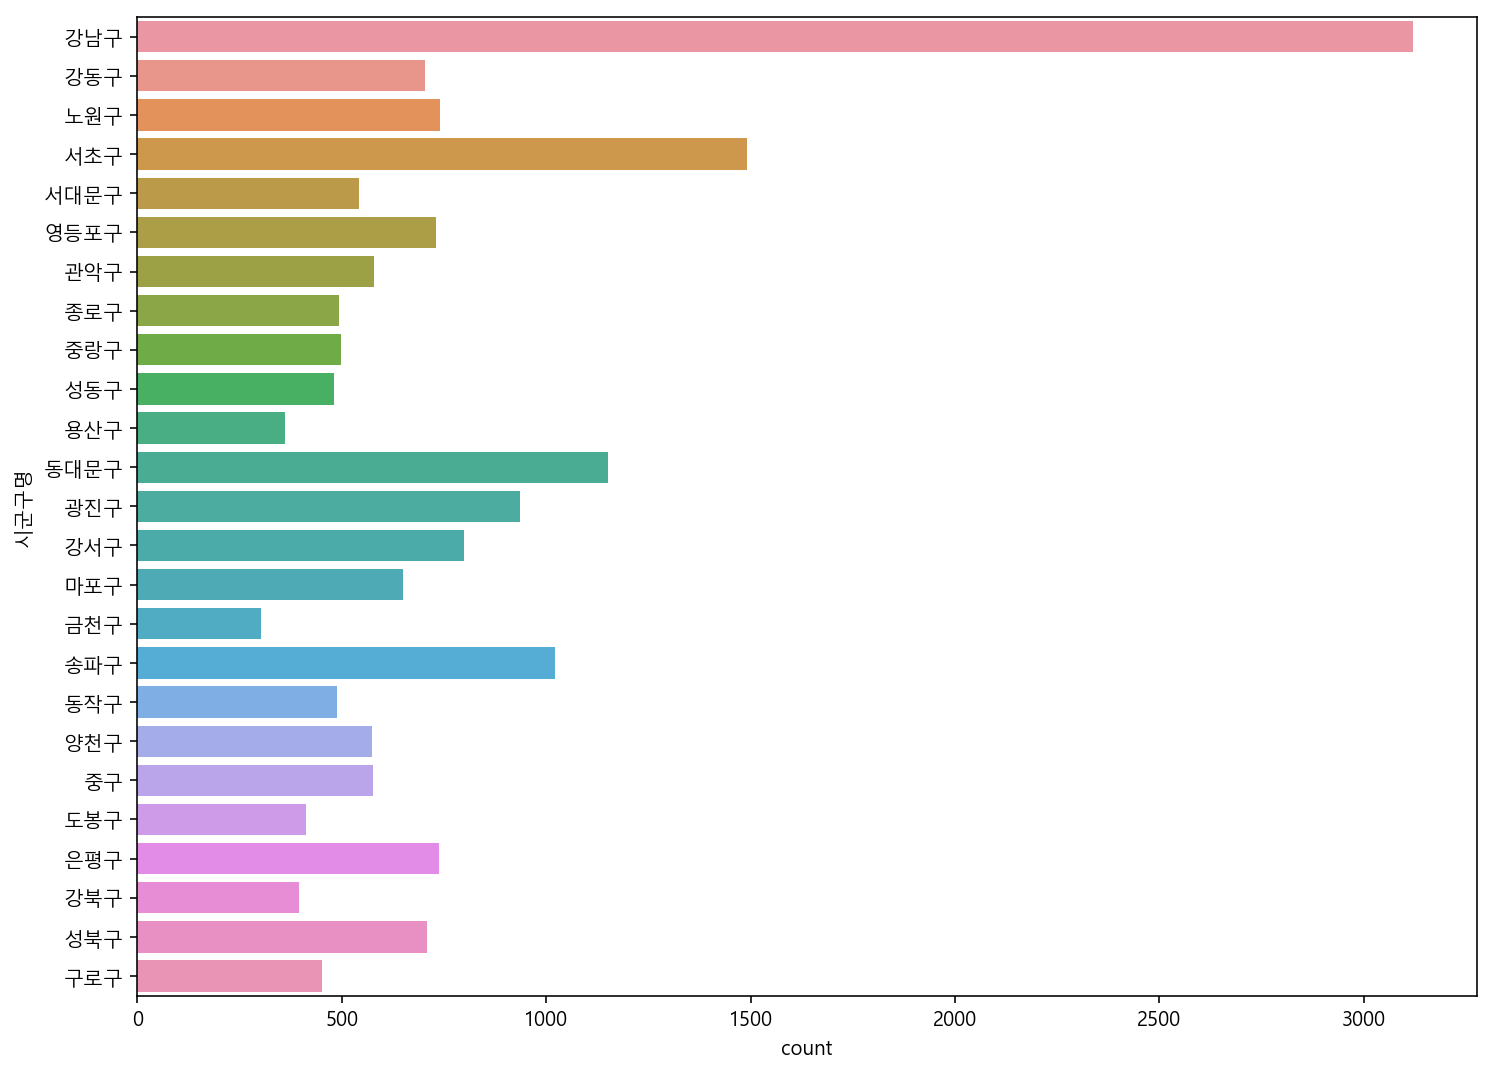

In [42]:
plt.figure(figsize=(12,9)) #figsize: inch로 사이즈 설정
sns.countplot(data=df_seoul, y='시군구명')

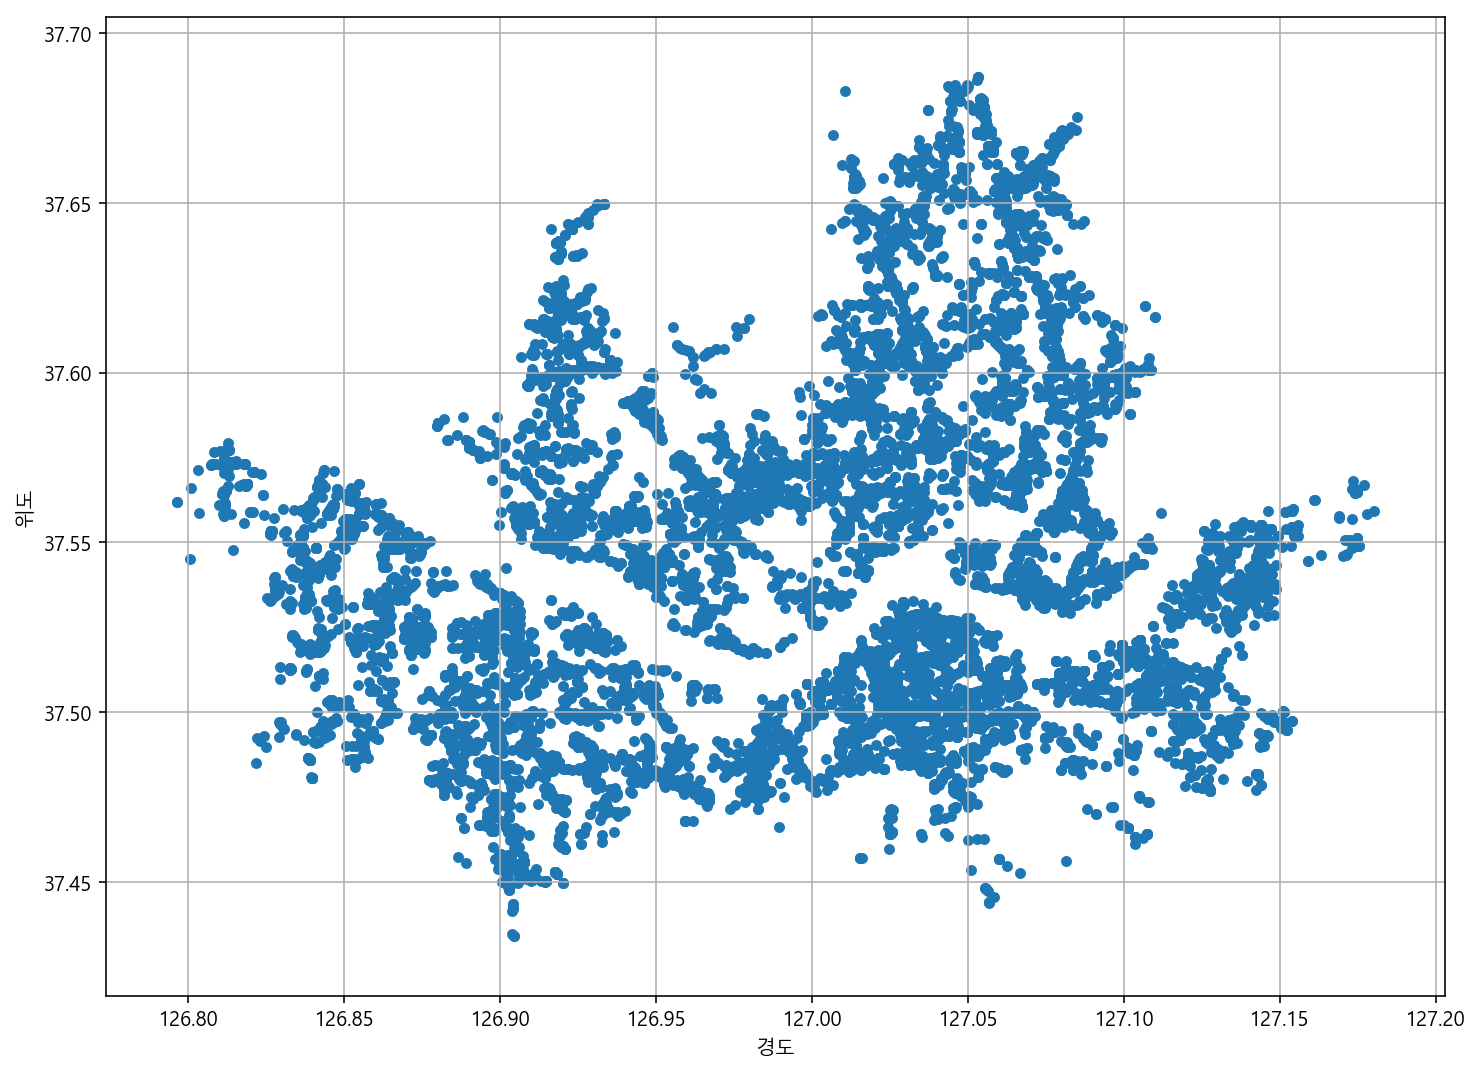

In [43]:
df_seoul[["경도","위도","시군구명"]].plot.scatter(x='경도',y='위도',figsize=(12,9),grid=True)

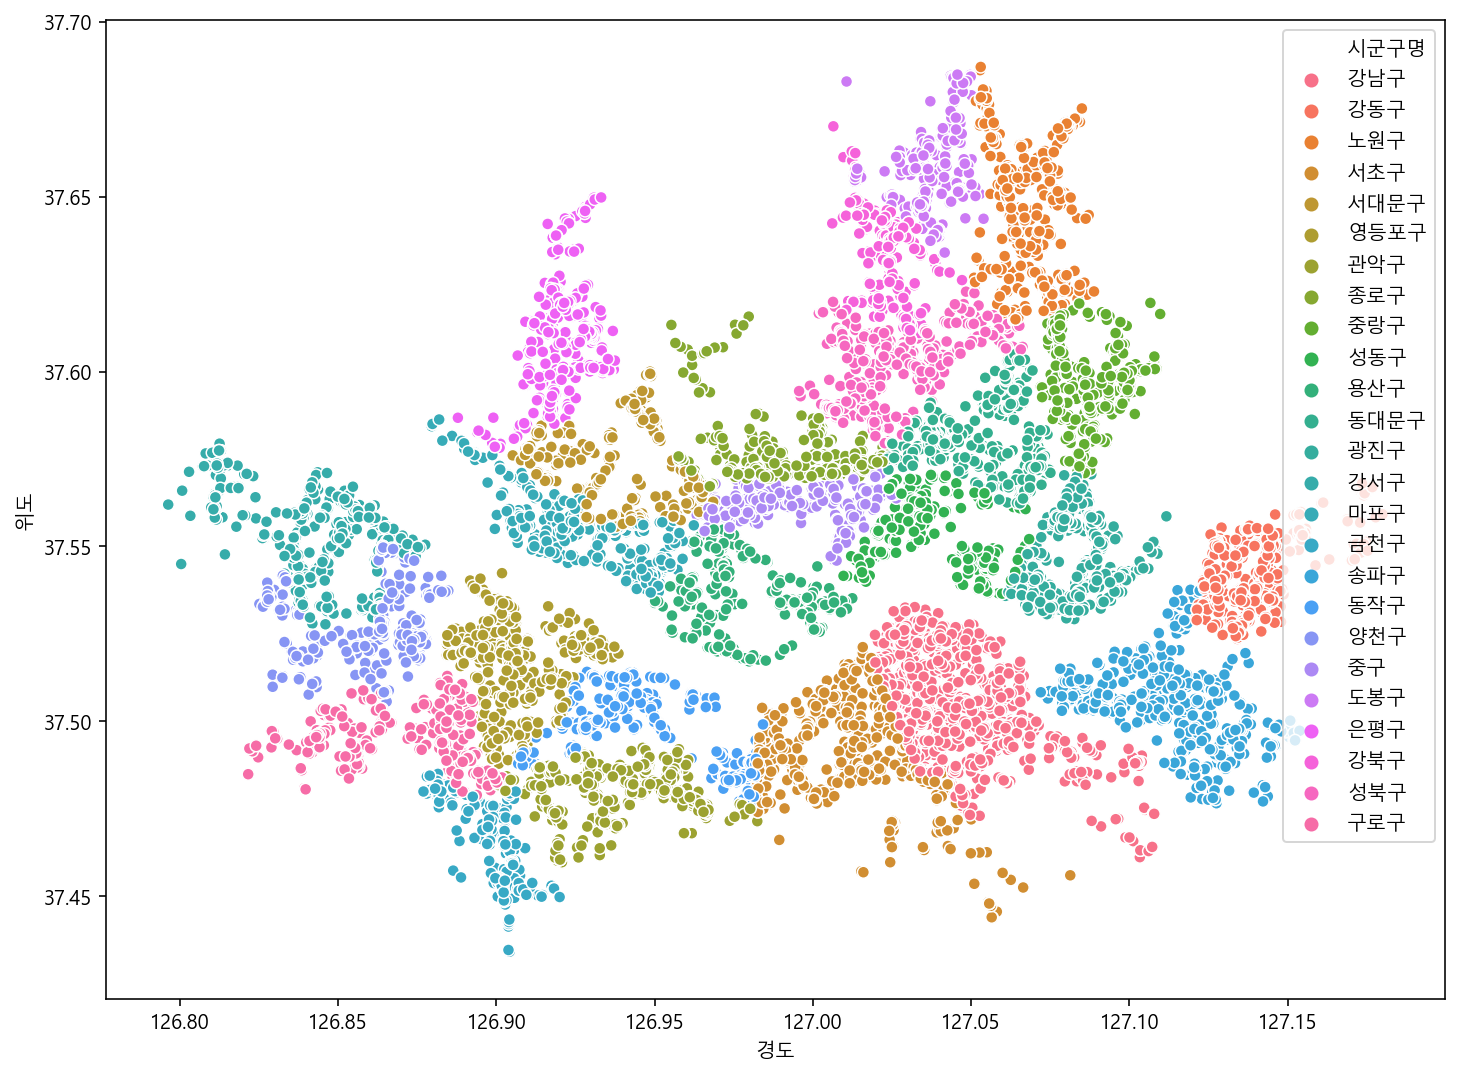

In [44]:
# seaborn을 활용하여 구까지 표시해보기
plt.figure(figsize=(12,9))
sns.scatterplot(
    data=df_seoul,
    x = '경도',
    y = '위도',
    hue = '시군구명'
)

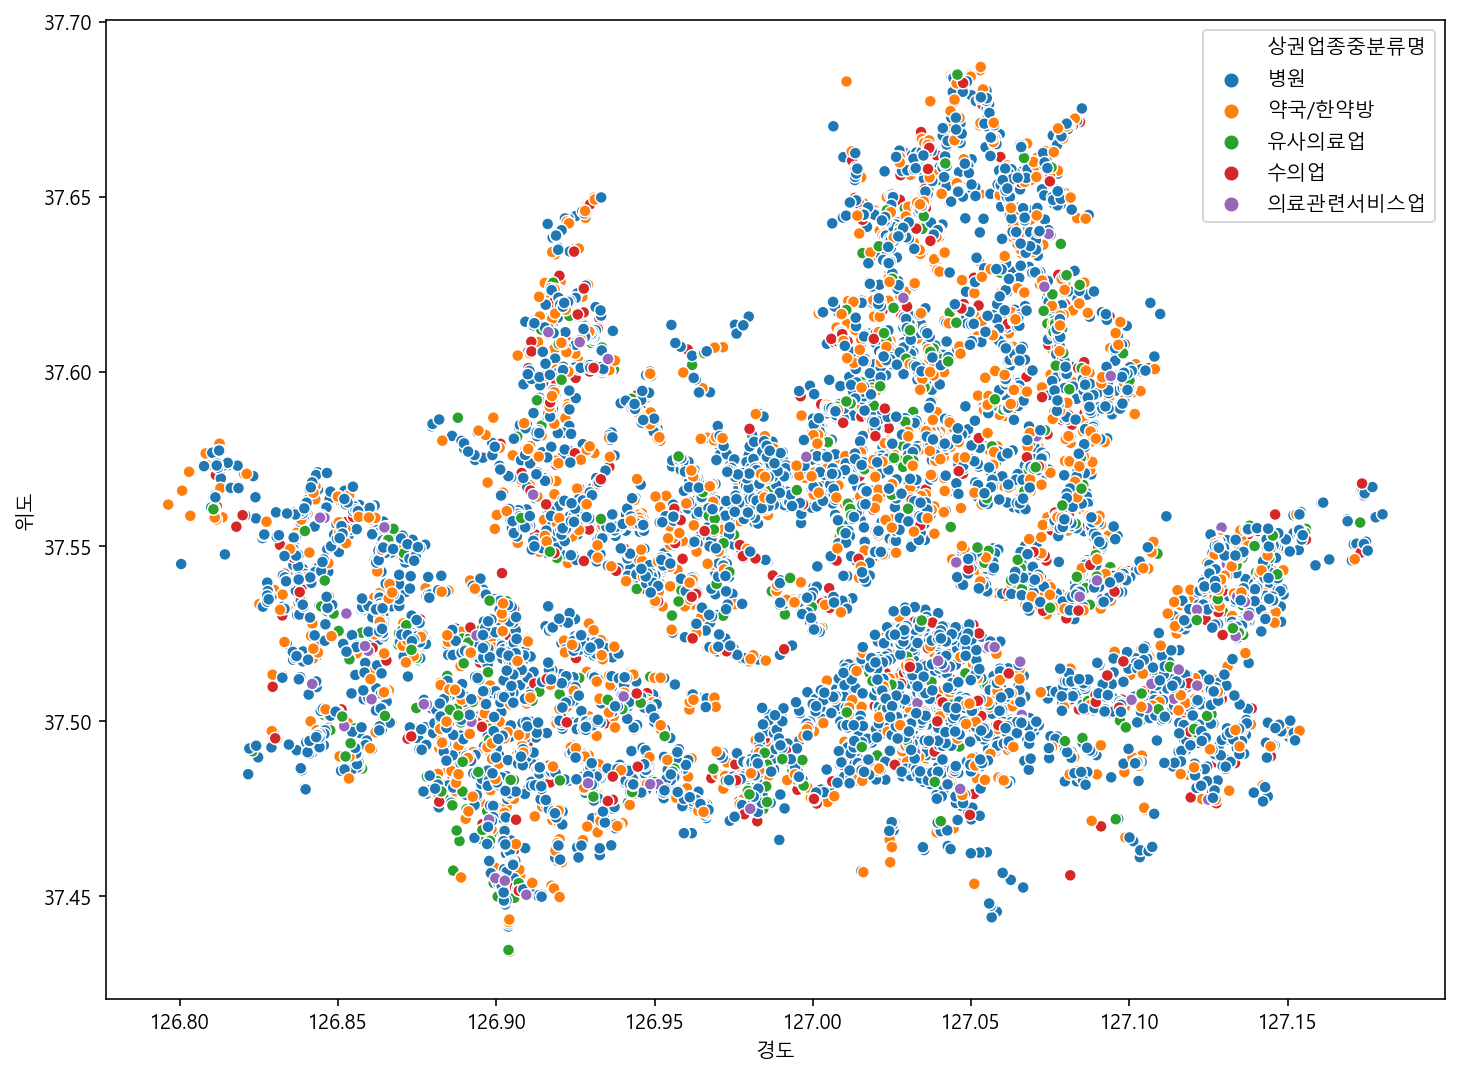

In [45]:
plt.figure(figsize=(12,9))
sns.scatterplot(
    data=df_seoul,
    x = '경도',
    y = '위도',
    hue = '상권업종중분류명'
)

## Folium을 이용한 지도표기
#### > Anaconda Prompt에서 아래 명령어로 설치
#### > conda install -c conda-forge folium

In [6]:
import folium

In [47]:
df_seoul_hospital = df_seoul[df_seoul['상권업종중분류명']=='병원']
df_seoul_hospital.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강남구 신사동 592-4,116803121022,서울특별시 강남구 논현로,826,1168010700105920004010990,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
9,20755460,헬로스마일소아과,S,의료,S01,병원,S01B11,소아과,11.0,서울특별시,...,서울특별시 강남구 논현동 39-18,116804166129,서울특별시 강남구 논현로131길,30,1168010800100390018000001,서울특별시 강남구 논현로131길 30,135010.0,6045.0,127.027878,37.514144
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강동구 성내동 9-5,117402000008,서울특별시 강동구 천호대로,1032,1174010800100090005004868,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
41,20916395,이태형한의원,S,의료,S01,병원,S01B06,한의원,11.0,서울특별시,...,서울특별시 노원구 중계동 506,113504130196,서울특별시 노원구 동일로203가길,29,1135010600105060000010657,서울특별시 노원구 동일로203가길 29,139880.0,1779.0,127.064245,37.639918


In [48]:
Map = folium.Map(location=[df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()], zoom_start=12)

for n in df_seoul_hospital.index :
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup_name = f'{name} - {address}'
    location=[df_seoul_hospital.loc[n,'위도'], df_seoul_hospital.loc[n, '경도']
              
    folium.Marker(
        location=location,
        popup=popup_name
    ).add_to(Map)
    
Map

SyntaxError: invalid syntax (<ipython-input-48-d99181537847>, line 9)

In [49]:
Map

NameError: name 'Map' is not defined

In [7]:
m = folium.Map(location=[45.523])

ValueError: Expected two (lat, lon) values for location, instead got: [45.523].